In [204]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Feature engineering
from sklearn.preprocessing import PolynomialFeatures

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")
train = train.drop("Unnamed: 0", axis=1)
test = test.drop("id", axis=1)

In [206]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, info=True):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        if info:
            # Print some summary information
            print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
                "There are " + str(mis_val_table_ren_columns.shape[0]) +
                " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [207]:
def apply_operations_to_columns(df1, df2, columns):
    new_df1_addition = df1[columns].copy()
    new_df2_addition = df2[columns].copy()

    new_df1_subtraction = df1[columns].copy()
    new_df2_subtraction = df2[columns].copy()

    new_df1_division = df1[columns].copy()
    new_df2_division = df2[columns].copy()


    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                new_col1 = f"{col1}_plus_{col2}"
                new_col2 = f"{col1}_plus_{col2}"
                new_df1_addition[new_col1] = df1[col1] + df1[col2]
                new_df2_addition[new_col2] = df2[col1] + df2[col2]
    
    new_df1_addition["damage_grade"] = df1["damage_grade"]
    new_df1_addition_corr = new_df1_addition.corr()["damage_grade"].sort_values()


    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                new_col1 = f"{col1}_minus_{col2}"
                new_col2 = f"{col1}_minus_{col2}"
                new_df1_subtraction[new_col1] = df1[col1] - df1[col2]
                new_df2_subtraction[new_col2] = df2[col1] - df2[col2]
    
    new_df1_subtraction["damage_grade"] = df1["damage_grade"]
    new_df1_subtraction_corr = new_df1_subtraction.corr()["damage_grade"].sort_values()


    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                new_col1 = f"{col1}_divided_by_{col2}"
                new_col2 = f"{col1}_divided_by_{col2}"
                new_df1_division[new_col1] = df1[col1] / df1[col2]
                new_df2_division[new_col2] = df2[col1] / df2[col2]

    new_df1_division["damage_grade"] = df1["damage_grade"]
    new_df1_division_corr = new_df1_division.corr()["damage_grade"].sort_values()

    correlations = pd.concat([new_df1_addition_corr.to_frame(), new_df1_subtraction_corr.to_frame(), new_df1_division_corr.to_frame()])
    corr_filtered = pd.concat([correlations.head(20), correlations.tail(20)])


    return corr_filtered


In [208]:
def polynomial_feature(df1, columns, target, degree):
    # Make a new dataframe for polynomial features
    poly_features = df1[columns]

    # Create the polynomial object with specified degree
    poly_transformer = PolynomialFeatures(degree=degree)

    # Train the polynomial features
    poly_features = poly_transformer.fit_transform(poly_features)
    
    # Create a dataframe of the features
    poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(columns))

    # Add in the target
    poly_features[target] = df1[target]

    print("Poly features shape is", poly_features.shape)

    # Find the correlations with the target
    poly_corrs = poly_features.corr()[target].sort_values().to_frame()
    corr = pd.concat([poly_corrs.head(20), poly_corrs.tail(20)])

    return corr

In [209]:
missing_values_table(train)

Your selected dataframe has 24 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
technical_solution_proposed,676014,93.5
type_of_roof,421208,58.3
plinth_area (ft^2),421208,58.3
type_of_ground_floor,332806,46.0
floors_before_eq (total),332806,46.0
height_before_eq (ft),332806,46.0
position,312006,43.2
type_of_other_floor,301606,41.7
building_plan_configuration,301606,41.7
land_surface_condition,301606,41.7


In [210]:
missing_values_table(test)

Your selected dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [211]:
mapping = {
    'floor two': 2,
    'Floor 3': 3,
    'Two Floor': 2,
    'two': 2,
    ' just 2 floor': 2,
    'There is 2 Floor/Story': 2,
    '1st Story': 1,
    'Floor 2': 2,
    'fifth': 5,
    'Three floor': 3,
    'floor one': 1,
    '2': 2,
    'Has 1 floor': 1,
    'one story': 1,
    'two story': 2,
    'floor second': 2,
    'floor third': 3,
    '3.00': 3,
    '1': 1,
    ' has 3 Floor': 3,
    '2 floor': 2,
    'three Story': 3,
    'Floor 1': 1,
    'floor 1st': 1,
    'one': 1,
    'Just 1 floor': 1,
    'Floor-three': 3,
    'Three': 3,
    'four Floor': 4,
    ' has Four fl': 4,
    'Fl four': 4,
    'Fl Five': 5,
    '6': 6,
    '5': 5,
    '4': 4,
    'Floor 4': 4,
    'floor four': 4,
    'Four Story': 4,
    'Four': 4,
    'Floor Fifth': 5,
    'five Floor': 5,
    ' Has Five fl': 5,
    '8': 8,
    '9': 9,
    '7': 7,
    'Has Five fl': 5,
}

# Apply the mapping to convert text values to numerical values
train["floors_before_eq (total)"] = train["floors_before_eq (total)"].map(mapping)
test["floors_before_eq (total)"] = test["floors_before_eq (total)"].map(mapping)

In [212]:
train["plinth_area (ft^2)"] = train["plinth_area (ft^2)"].replace('More than 1000 ft^2', 1005)
test["plinth_area (ft^2)"] = test["plinth_area (ft^2)"].replace('More than 1000 ft^2', 1005)


train["plinth_area (ft^2)"] = train["plinth_area (ft^2)"].str.replace(' ft^2', '', regex=False).astype(float).astype('Int64')
test["plinth_area (ft^2)"] = test["plinth_area (ft^2)"].str.replace(' ft^2', '', regex=False).astype(float).astype('Int64')

In [213]:
train["no_family_residing"] = train["no_family_residing"].replace('None', 0).astype('Float32')
test["no_family_residing"] = test["no_family_residing"].replace('None', 0).astype('Float32')

In [214]:
train["type_of_reinforcement_concrete"] = train["type_of_reinforcement_concrete"].astype('Int16')
test["type_of_reinforcement_concrete"] = test["type_of_reinforcement_concrete"].astype('Int16')

train["wall_binding"] = train["wall_binding"].astype('Int16')
test["wall_binding"] = test["wall_binding"].astype('Int16')

train["wall_material"] = train["wall_material"].astype('Int16')
test["wall_material"] = test["wall_material"].astype('Int16')

In [215]:
# Gets the categorical and numerical columns
categorical = [c for c in train.columns 
               if train.dtypes[c] == 'object']

numerical = [c for c in train.columns 
             if train.dtypes[c] != 'object']

# Correct these columns
numerical.remove("wall_binding")
numerical.remove("wall_material")
numerical.remove("type_of_reinforcement_concrete")
numerical.remove("has_secondary_use")

categorical.append("wall_binding")
categorical.append("wall_material")
categorical.append("type_of_reinforcement_concrete")
categorical.append("has_secondary_use")

In [216]:
train[numerical].head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),no_family_residing,damage_grade
0,2.0,1.0,256,22.0,1.0,1.0
1,3.0,3.0,985,18.0,1.0,5.0
2,2.0,7.0,<NA>,14.0,1.0,5.0
3,2.0,18.0,185,15.0,1.0,4.0
4,2.0,22.0,290,17.0,1.0,1.0


In [217]:
train['technical_solution_proposed'].value_counts()/len(train)

Reconstruction    0.039909
Major repair      0.011017
Minor repair      0.009480
No need           0.004343
Name: technical_solution_proposed, dtype: float64

In [218]:
for col in categorical:
    print(col)
    print(train[col].value_counts()/len(train))
    print()

land_surface_condition
Flat              0.482969
Moderate slope    0.080523
Steep slope       0.019243
Name: land_surface_condition, dtype: float64

type_of_foundation
Clay Sand Mixed mortar-Stone/Brick    0.276580
Clay mortar-Stone/Brick               0.219514
Mud mortar-Stone/Brick                0.055919
Cement-Stone or Cement-Brick          0.027224
Bamboo/TImber                         0.022800
Bamboo or Timber                      0.020377
RC                                    0.019239
Reinforced Concrete                   0.008935
Bamboo/Timber                         0.007420
Cement-Stone/Brick                    0.007075
Other                                 0.002298
Others                                0.001686
Name: type_of_foundation, dtype: float64

type_of_roof
Bamboo/Timber Light roof                0.110180
Wood Light Roof or Bamboo Heavy Roof    0.096975
Wood Light Roof or Bamboo Light Roof    0.082843
Bamboo/TImber-Light Roof                0.055451
Bamboo or Timber

In [219]:
grouped_values = {
    'Bamboo/Timber Light roof': ['Bamboo/Timber Light roof', 'Bamboo or Timber Light roof', 'Bamboo/TImber-Light Roof'],
    'Wood Light Roof or Bamboo Heavy Roof': ['Wood Light Roof or Bamboo Heavy Roof'],
    np.nan: [np.nan],
    'Wood Light Roof or Bamboo Light Roof': ['Wood Light Roof or Bamboo Light Roof'],
    'Reinforced Brick Slab/rcc/rbc': ['Reinforced Brick Slab/rcc/rbc', 'Reinforced brick concrete/rcc/rbc'],
    'Bamboo/Timber Heavy roof': ['Bamboo/Timber Heavy roof', 'Bamboo or Timber Heavy roof', 'Bamboo/TImber-Heavy Roof'],
    'Reinforced cement concrete/rb/rbc': ['Reinforced cement concrete/rb/rbc', 'rcc/rb/rbc, reinforced cement concrete/rb/rbc']
}

train['type_of_roof'] = train['type_of_roof'].replace({value: group for group, values in grouped_values.items() for value in values})
test['type_of_roof'] = test['type_of_roof'].replace({value: group for group, values in grouped_values.items() for value in values})

In [220]:
grouped_values = {
    'Bamboo or Timber': ['Bamboo or Timber', 'Bamboo/TImber', 'Bamboo/Timber'],
    'Clay Sand Mixed mortar-Stone/Brick': ['Clay Sand Mixed mortar-Stone/Brick'],
    'Mud mortar-Stone/Brick': ['Mud mortar-Stone/Brick'],
    np.nan: [np.nan],
    'Clay mortar-Stone/Brick': ['Clay mortar-Stone/Brick'],
    'Reinforced Concrete': ['Reinforced Concrete', 'RC'],
    'Cement-Stone or Cement-Brick': ['Cement-Stone or Cement-Brick', 'Cement-Stone/Brick'],
    'Others': ['Others', 'Other']
}

train['type_of_foundation'] = train['type_of_foundation'].replace({value: group for group, values in grouped_values.items() for value in values})
test['type_of_foundation'] = test['type_of_foundation'].replace({value: group for group, values in grouped_values.items() for value in values})

In [221]:
grouped_values = {
    'Clay': ['Clay'],
    np.nan : [np.nan],
    'Mud': ['Mud', 'mud'],
    'Brick or Stone': ['Brick or Stone', 'brick/stone', 'Brick/Stone'],
    'Reinforced Concrete': ['Reinforced Concrete', 'reinforced concrete', 'RC'],
    'soil, water, loam Mixed': ['soil, water, loam Mixed'],
    'Other': ['Other'],
    'Lumber': ['Lumber', 'Timber', 'TImber', 'Timber', 'Wood']
}

train['type_of_ground_floor'] = train['type_of_ground_floor'].replace({value: group for group, values in grouped_values.items() for value in values})
test['type_of_ground_floor'] = test['type_of_ground_floor'].replace({value: group for group, values in grouped_values.items() for value in values})

In [222]:
grouped_values = {
    'Timber/Bamboo-Mud': ['TImber/Bamboo-Mud', 'Wood-Mud or Bamboo Mud', 'Timber Mud or Bamboo-Mud', 'Wood or Bamboo Mud'],
    np.nan: [np.nan],
    'Not applicable': ['Not applicable'],
    'rcc/rb/rbc': ['rcc/rb/rbc', 'Reinforced brick concrete/rcc/rbc', 'reinforced cement concrete/rb/rbc'],
    'Wood-Plank': ['Wood-Plank', 'Timber-Planck', 'Lumber-plank']
}

train['type_of_other_floor'] = train['type_of_other_floor'].replace({value: group for group, values in grouped_values.items() for value in values})
test['type_of_other_floor'] = test['type_of_other_floor'].replace({value: group for group, values in grouped_values.items() for value in values})

In [223]:
grouped_values = {
    'Private Use': ['Private Use', 'Private', 'Prvt', 'Privste'],
    np.nan: [np.nan],
    'Public Space': ['Public Space'],
    'Public Use': ['Public Use', 'Public'],
    'Unknown': ['Unknown'],
    'Institutionals': ['Institutionals', 'Institutional Use', 'Institutional'],
    'Other': ['Other', 'Unspecified']
}

train['legal_ownership_status'] = train['legal_ownership_status'].replace({value: group for group, values in grouped_values.items() for value in values})
test['legal_ownership_status'] = test['legal_ownership_status'].replace({value: group for group, values in grouped_values.items() for value in values})

In [224]:
grouped_values = {
    'Non-residential': ['Non-residential'],
    np.nan: [np.nan],
    'Hotel/Motel': ['Hotel/Motel'],
    'Rental Residential': ['Rental Residential'],
    'Housing': ['Housing'],
    'Other': ['Other', 'Other Residential Type']
}

train['residential_type'] = train['residential_type'].replace({value: group for group, values in grouped_values.items() for value in values})
test['residential_type'] = test['residential_type'].replace({value: group for group, values in grouped_values.items() for value in values})

In [225]:
grouped_values = {
    'Non-public': ['Non-public'],
    'Religious Sites': ['Religious Sites'],
    'Other Institutional Building': ['Other Institutional Building'],
    'Drugstore': ['Drugstore'],
    'Health Clinics': ['Health Clinics', 'Hospital'],
    'Shopping Sites': ['Shopping Sites'],
    'High School': ['High School'],
    'University': ['University'],
    'Middle School': ['Middle School'],
    'Primary School': ['Primary School'],
    'Recreational Park': ['Recreational Park'],
    'Museum': ['Museum']
}

train['public_place_type'] = train['public_place_type'].replace({value: group for group, values in grouped_values.items() for value in values})
test['public_place_type'] = test['public_place_type'].replace({value: group for group, values in grouped_values.items() for value in values})

In [226]:
grouped_values = {
    'Non-industrial': ['Non-industrial'],
    np.nan: [np.nan],
    'Metallurgy': ['Metallurgy'],
    'Service/Tourism': ['Service/Tourism'],
    'Food': ['Food'],
    'Manufacturing': ['Manufacturing'],
    'Infrastructure': ['Infrastructure'],
    'Agro': ['Agro', 'Farm'],
    'Forest-based': ['Forest-based']
}

train['industrial_use_type'] = train['industrial_use_type'].replace({value: group for group, values in grouped_values.items() for value in values})
test['industrial_use_type'] = test['industrial_use_type'].replace({value: group for group, values in grouped_values.items() for value in values})

In [227]:
grouped_values = {
    'Govermental Buildings' : ['Police Offices']
}

train['govermental_use_type'] = train['govermental_use_type'].replace({value: group for group, values in grouped_values.items() for value in values})
test['govermental_use_type'] = test['govermental_use_type'].replace({value: group for group, values in grouped_values.items() for value in values})

In [228]:
train["no_family_residing"] = train["no_family_residing"].fillna(1)
train["residential_type"] = train["residential_type"].fillna("Non-residential")
train["industrial_use_type"] = train["industrial_use_type"].fillna("Non-Non-industrial")

In [229]:
train = train[train["technical_solution_proposed"].notna()]
train.shape, test.shape

((46801, 24), (242082, 23))

In [230]:
ordinal_map = {
    "technical_solution_proposed": ['No need','Minor repair','Major repair','Reconstruction']
}

ordinal = [col for col in ordinal_map.keys()]
onehot = [col for col in categorical if col not in ordinal_map.keys()]

In [231]:
cleanup_nums = {
    "technical_solution_proposed": {"No need": 0,
                                     "Minor repair": 1,
                                     "Major repair": 2,
                                     "Reconstruction": 3}
}
train = train.replace(cleanup_nums)
test = test.replace(cleanup_nums)

In [232]:
numerical.insert(0, "technical_solution_proposed")
corr = train[numerical].corr()
corr["damage_grade"].sort_values(ascending=False)

damage_grade                   1.000000
technical_solution_proposed    0.900235
floors_before_eq (total)       0.199355
height_before_eq (ft)          0.061135
old_building                   0.055898
no_family_residing             0.046817
plinth_area (ft^2)            -0.131248
Name: damage_grade, dtype: float64

In [233]:
numerical.remove("damage_grade")
apply_operations_to_columns(train, test, numerical)

,damage_grade
plinth_area (ft^2)_plus_floors_before_eq (total),-0.131454
floors_before_eq (total)_plus_plinth_area (ft^2),-0.131454
plinth_area (ft^2),-0.131248
no_family_residing_plus_plinth_area (ft^2),-0.131070
plinth_area (ft^2)_plus_no_family_residing,-0.131070
height_before_eq (ft)_plus_plinth_area (ft^2),-0.127729
plinth_area (ft^2)_plus_height_before_eq (ft),-0.127729
plinth_area (ft^2)_plus_technical_solution_proposed,-0.126119
technical_solution_proposed_plus_plinth_area (ft^2),-0.126119
plinth_area (ft^2)_plus_old_building,-0.101677


In [234]:
train["technical_solution_proposed_divided_by_no_family_residing"] = train["technical_solution_proposed"] / train["no_family_residing"]
test["technical_solution_proposed_divided_by_no_family_residing"] = test["technical_solution_proposed"] / test["no_family_residing"]

train["technical_solution_proposed_divided_by_height_before_eq (ft)"] = train["technical_solution_proposed"] / train["height_before_eq (ft)"]
test["technical_solution_proposed_divided_by_height_before_eq (ft)"] = test["technical_solution_proposed"] / test["height_before_eq (ft)"]

train["technical_solution_proposed_divided_by_floors_before_eq (total)"] = train["technical_solution_proposed"] / train["floors_before_eq (total)"]
test["technical_solution_proposed_divided_by_floors_before_eq (total)"] = test["technical_solution_proposed"] / test["floors_before_eq (total)"]

train["technical_solution_proposed_divided_by_plinth_area (ft^2)"] = train["technical_solution_proposed"] / train["plinth_area (ft^2)"]
test["technical_solution_proposed_divided_by_plinth_area (ft^2)"] = test["technical_solution_proposed"] / test["plinth_area (ft^2)"]



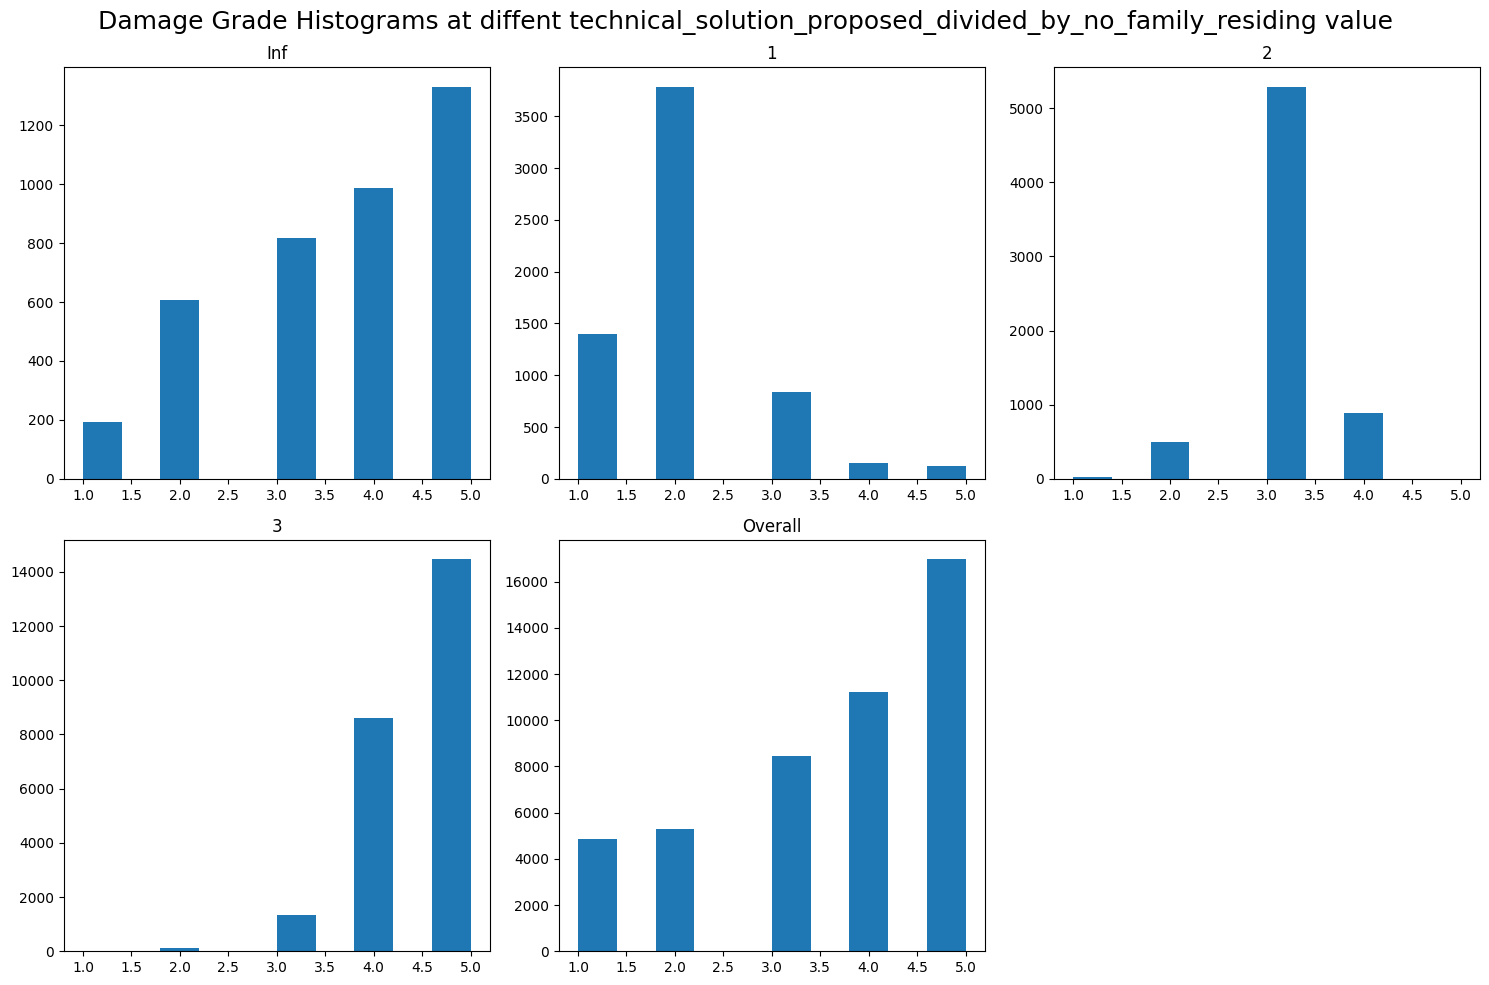

In [236]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Plot the histogram of "damage_grade" filtered by a condition in the first subplot
ax[0, 0].hist(train[train["technical_solution_proposed_divided_by_no_family_residing"] == np.inf]["damage_grade"])
ax[0, 0].set_title("Inf")

ax[0, 1].hist(train[train["technical_solution_proposed_divided_by_no_family_residing"] == 1]["damage_grade"])
ax[0, 1].set_title("1")

ax[0, 2].hist(train[train["technical_solution_proposed_divided_by_no_family_residing"] == 2]["damage_grade"])
ax[0, 2].set_title("2")

ax[1, 0].hist(train[train["technical_solution_proposed_divided_by_no_family_residing"] == 3]["damage_grade"])
ax[1, 0].set_title("3")

# Plot the overall histogram of "damage_grade" in the fifth subplot
ax[1, 1].hist(train["damage_grade"])
ax[1, 1].set_title("Overall")

# Hide the sixth subplot (empty subplot)
ax[1, 2].axis("off")

# Add labels and a title to the entire figure
fig.suptitle("Damage Grade Histograms at diffent technical_solution_proposed_divided_by_no_family_residing value", fontsize=18)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()


In [237]:
train["technical_solution_proposed_divided_by_no_family_residing"] = train["technical_solution_proposed_divided_by_no_family_residing"].replace([np.inf, -np.inf], np.nan)
test["technical_solution_proposed_divided_by_no_family_residing"] = test["technical_solution_proposed_divided_by_no_family_residing"].replace([np.inf, -np.inf], np.nan)

In [238]:
temp = train.copy()

temp["floors_before_eq (total)"] = temp["floors_before_eq (total)"].fillna(temp["floors_before_eq (total)"].median())
temp["plinth_area (ft^2)"] = temp["plinth_area (ft^2)"].astype('Float32')
temp["plinth_area (ft^2)"] = temp["plinth_area (ft^2)"].fillna(temp["plinth_area (ft^2)"].mean())


polynomial_feature(temp, numerical, "damage_grade", degree=3)

Poly features shape is (46801, 85)


,damage_grade
no_family_residing,-0.003561
old_building plinth_area (ft^2) no_family_residing,0.001760
old_building no_family_residing^2,0.002968
old_building plinth_area (ft^2)^2,0.004526
old_building plinth_area (ft^2) height_before_eq (ft),0.005247
floors_before_eq (total) old_building plinth_area (ft^2),0.005708
plinth_area (ft^2) no_family_residing,0.006059
no_family_residing^2,0.006404
floors_before_eq (total) old_building no_family_residing,0.006447
old_building^2 no_family_residing,0.006497


In [243]:
print(onehot)

['land_surface_condition', 'type_of_foundation', 'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor', 'position', 'building_plan_configuration', 'legal_ownership_status', 'residential_type', 'public_place_type', 'industrial_use_type', 'govermental_use_type', 'flexible_superstructure', 'wall_binding', 'wall_material', 'type_of_reinforcement_concrete', 'has_secondary_use']


In [242]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column using LabelEncoder
train["flexible_superstructure"] = label_encoder.fit_transform(train["flexible_superstructure"])
test["flexible_superstructure"] = label_encoder.transform(test["flexible_superstructure"])

train["govermental_use_type"] = label_encoder.fit_transform(train["govermental_use_type"])
test["govermental_use_type"] = label_encoder.transform(test["govermental_use_type"])

# ohe
train = pd.get_dummies(train, columns=onehot)
test = pd.get_dummies(test, columns=onehot)
y = train["damage_grade"]
train, test = train.align(test, join='inner', axis=1)
train["damage_grade"] = y

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (46801, 104)
Testing shape:  (242082, 103)


In [246]:
# train.to_csv("Dataset/train_fe_fillna_lessrow_lessunique_le_ohe.csv", index=False)
# test.to_csv("Dataset/test_fe_fillna_lessrow_lessunique_le_ohe.csv", index=False)